# E-commerce — Выявление профилей потребления

**Цель исследования** — cегментировать покупателей по профилю потребления на основе истории их покупок с целью разработки более персонализированных предложений для покупателей. 

**Ход исследования**

Данные с транзакциями интернет-магазина товаров для дома и быта «Пока все ещё тут» получены из файла: `ecommerce_dataset.csv`.

Исследование будет включать следующие этапы:

1. [Обзор данных](#data)
2. [Предобработка данных](#pretreat): изучим пропуски, проверим типы данных, устраним дубликаты, а также редкие и выбивающиеся значения
3. [Исследовательский анализ данных](#eda):
    - [выделение категорий товаров](#category)
    - [определение сезонности товаров](#season)
4. [Сегментация покупателей на основе истории их покупок](#segment)   
5. [Формулировка и проверка статистических гипотез](#hypo) - выявление различий или сходств между категориями
6. [Общие выводы и рекомендации](#conclusion)
7. Презентация (https://disk.yandex.ru/i/2JUOOtgXjbjuBw)
8. Дашборд Набор №1:
    - диаграмма количества покупок по дням
    - индикатор количества покупателей
    - фильтр дашборда по дате совершения покупки

<a id="info"></a>
## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/ecommerce_dataset.csv', sep=',')

display(data.head())

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


В таблице 6 столбцов. Всего представлены записи о 6 737 транзакциях.

Присутствуют различные типы данных - object, float64, int64.

Структура ecommerce_dataset.csv:

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.


<a id="pretreat"></a>
## Предобработка данных

Количество значений в столбцах не различается. Значит, в данных пропусков нет.

Проверим данные на наличие дубликатов.

In [4]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют. Проверим, есть ли неявные. Исключим дату и посмотрим на связку id пользователя, id заказа и товар.

In [5]:
data.duplicated(['customer_id', 'order_id', 'product']).sum()

1886

In [6]:
dupl = data[data.duplicated(['customer_id', 'order_id', 'product'])]
dupl = dupl.reset_index()
dupl = dupl.sort_values(by=['order_id', 'product'])
display(dupl.head(20))

,index,date,customer_id,order_id,product,quantity,price
24,376,2018102313,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0
51,509,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0
83,588,2018110214,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0
109,758,2018111017,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0
115,816,2018111515,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0
118,827,2018111616,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0
25,377,2018102313,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0
52,510,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0
84,589,2018110214,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0
110,759,2018111017,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0


В данных присутствуют повторы. Единственное, что их отличает - время заказа. Возможно, в базу записывались все действия с корзиной во время посещения сайта - добавление/удаление товара, обновление/просмотр страницы. За истинный заказ возьмем последнюю по времени запись.

In [7]:
data_cut = data.drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='last')
data_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4851 non-null   int64  
 1   customer_id  4851 non-null   object 
 2   order_id     4851 non-null   int64  
 3   product      4851 non-null   object 
 4   quantity     4851 non-null   int64  
 5   price        4851 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 265.3+ KB


После удаления повторов осталась 4851 запись.

Приведем дату к типу datetime.

In [8]:
pd.options.mode.chained_assignment = None

In [9]:
data_cut['date'] = pd.to_datetime(data_cut['date'], format='%Y%m%d%H')
display(data_cut.head())
data_cut.info()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4851 non-null   datetime64[ns]
 1   customer_id  4851 non-null   object        
 2   order_id     4851 non-null   int64         
 3   product      4851 non-null   object        
 4   quantity     4851 non-null   int64         
 5   price        4851 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 265.3+ KB


Выясним временные рамки.

In [10]:
print(data_cut['date'].min())
print(data_cut['date'].max())

2018-10-01 00:00:00
2019-10-31 16:00:00


Данные представлены за год и 1 месяц.

 Cоздадим столбцы с номером месяца и временем года.

In [11]:
data_cut['month'] = data_cut['date'].dt.month

In [12]:
data_cut['year_month'] = data_cut['date'].apply(lambda x: x.strftime('%Y-%m')) 

In [13]:
def season(month):
    try:
        if month==1 or month==2 or month==12:
            return 'зима'
        elif 3<=month<=5:
            return 'весна'
        elif 6<=month<=8:
            return 'лето'
        elif 9<=month<=11:
            return 'осень'
    except:
        return '-'  

In [14]:
data_cut['season'] = data_cut['month'].apply(season)
data_cut.head()

,date,customer_id,order_id,product,quantity,price,month,year_month,season
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,2018-10,осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,10,2018-10,осень
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,2018-10,осень
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,2018-10,осень
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,2018-10,осень


Создадим новый столбец с суммой заказа.

In [15]:
data_cut['sum'] = data_cut['quantity']*data_cut['price']

Построим общую гистограмму для всех столбцов.

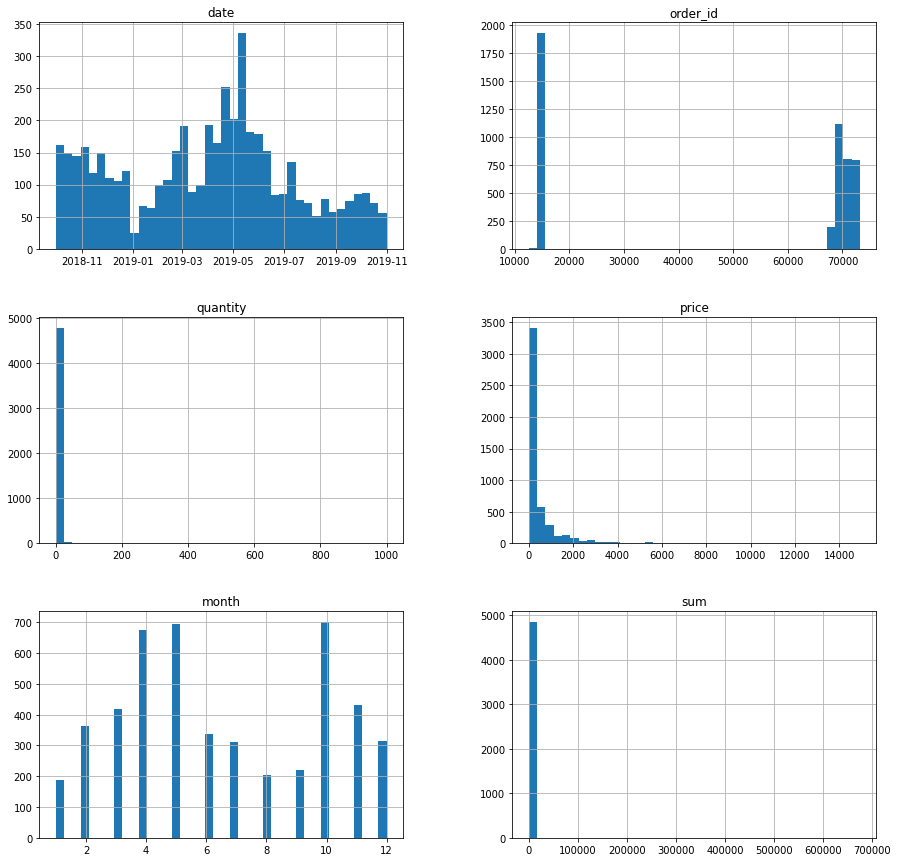

In [16]:
data_cut.hist(bins=40, figsize=(15, 15));

Предварительно можно сказать, что выбросы присутствуют на всех значимых графиках - даты покупки, количества товара, цены и суммы. Данные гистограммы будем использовать в дальнейшем исследовании при выявлении аномалий.

Изучим подробнее отдельные столбцы.

In [17]:
data_cut['quantity'].describe()

count    4851.000000
mean        2.835910
std        17.642155
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

Максимальное количество единиц товара в заказе - 1000 штук! При этом в 75% заказов - не более 1 единицы. Возможно, стоит исключить данный заказ при дальнейшем анализе.

In [18]:
data_cut['price'].describe()

count     4851.000000
mean       516.092971
std        946.085142
min          9.000000
25%         90.000000
50%        150.000000
75%        502.000000
max      14917.000000
Name: price, dtype: float64

Основная масса товаров представлена в ценовой категории до 500 у.е. Однако, есть среди покупок и что-то подороже - максимальная цена товара 14 917 у.е.

In [19]:
data_cut['sum'].describe()

count      4851.000000
mean        852.206555
std        9829.440953
min           9.000000
25%         120.000000
50%         194.000000
75%         734.000000
max      675000.000000
Name: sum, dtype: float64

В максимальной сумме заказа, скорее всего, оказался заказ на 1000 шт. товара. Общая сумма составила 675 000. В то время как 75% остальных заказов были не дороже 700.

Посмотрим детальнее на самые объемные заказы.

In [20]:
data_cut.sort_values(by='quantity', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,month,year_month,season,sum
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,6,2019-06,лето,675000.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,6,2019-06,лето,49432.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0,5,2019-05,весна,15300.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0,12,2018-12,зима,5800.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0,11,2018-11,осень,8670.0
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0,3,2019-03,весна,3000.0
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0,10,2018-10,осень,5700.0
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0,10,2018-10,осень,2850.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0,11,2018-11,осень,8260.0
6535,2019-10-07 11:00:00,d933280e-5372-448f-be44-b269c8bafc2a,72885,"Крепеж для пружины дверной оцинкованный, 1107054",100,19.0,10,2019-10,осень,1900.0


Первые пять заказов по количеству товаров явно оптовые - 1000 вантузов по 675 у.е. искажают всю картину. Такой объемный заказ на вантузы имеет место быть, аномалией его считать не будем. Однако, из дальнейшего анализа его исключим. 

In [21]:
data_cut = data_cut.query('quantity<1000')

Посмотрим, какие максимальные суммы присутствуют в датасете.

In [22]:
data_cut.sort_values(by='sum', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,month,year_month,season,sum
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,6,2019-06,лето,49432.0
1518,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-0...,27,1755.0,1,2019-01,зима,47385.0
1299,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъе...,57,574.0,12,2018-12,зима,32718.0
1023,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Набор ножей Attribute CHEF 5 предметов AKF522,64,457.0,11,2018-11,осень,29248.0
661,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",5,4874.0,11,2018-11,осень,24370.0
1675,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,Мусорный контейнер Hailo BigBin Swing 45 0845-...,3,5512.0,2,2019-02,зима,16536.0
2971,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х20...,10,1568.0,4,2019-04,весна,15680.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0,5,2019-05,весна,15300.0
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0,7,2019-07,лето,14917.0
2970,2019-04-19 18:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71205,Наматрацник Natures Бархатный бамбук ББ-Н-1-2 ...,12,1183.0,4,2019-04,весна,14196.0


За исключением первой строки сумма растет примерно равномерно. И здесь же на предпоследней девятой строке видим тот самый наиболее дорогой товар - уличная сушилка за 14 917. Проверим это.

In [23]:
data_cut.sort_values(by='price', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,month,year_month,season,sum
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0,7,2019-07,лето,14917.0
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737.0,4,2019-04,весна,8737.0
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437.0,2,2019-02,зима,8437.0
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0,4,2019-04,весна,8077.0
6629,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 ...,1,7724.0,10,2019-10,осень,7724.0
5994,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucs...,1,7679.0,7,2019-07,лето,7679.0
2339,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bass...,1,7679.0,3,2019-03,весна,7679.0
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597.0,11,2018-11,осень,7597.0
1241,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,Гладильная доска Leifheit AirBoard Compact M P...,1,7424.0,12,2018-12,зима,7424.0
6169,2019-08-23 12:00:00,8d85f320-5f55-4647-814c-da1a6b21c2a4,72381,Урна уличная стальная Сальвадор 02.021.0 46х11...,1,7349.0,8,2019-08,лето,7349.0


Действительно, кроме сушилки цена на остальные товары растет равномерно.

Изучим наименования товаров в столбце product. Предварительно приведем все названия к нижнему регистру.

In [24]:
pd.options.display.max_rows = None
display(data_cut['product'].value_counts().sort_index(ascending=True).to_frame())

,product
Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,1
Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,1
Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,2
Ёрш бутылочный с металлической ручкой малый Y64 1807002,1
"Ёрш для бутылки из натурального волокна и металла 23 см кремовый, Burstenmann, 0473/0003",1
Ёрш радиаторный без ручки 1807007,1
"Ёрш унитазный пластмассовый, Ваир 1712002",1
"Ёрш унитазный с деревянной ручкой , Ваир 1712012",8
"Ёрш унитазный с подставкой WC ""Люкс"", Мультипласт, 1712007",2
"Ёрш унитазный с подставкой WC ""Стандарт"", Мультипласт 1712010",1


Разделим товары на 6 категорий: растения, декор, текстиль, быт, кухня и ремонт.

In [25]:
def categorize_product(row):
    if 'ассада' in row or 'Алиссум' in row or 'Антуриум' in row or 'Арбуз' in row or 'Базилик' in row or 'Бакопа' in row or 'Бархатцы' in row or 'Бегония' in row or 'в горшке' in row or 'Вербе' in row or 'цветк' in row or 'Гвоздика' in row or 'Георгина' in row or 'Герань' in row or 'черенок' in row or 'Гипсофила' in row or 'Годеция' in row or 'Горох' in row or 'Гортензия' in row or 'виноград' in row or 'Декабрист' in row or 'Дыня' in row or 'Ель' in row or 'Зверобой' in row or 'Земляника' in row or 'Календула' in row or 'Калибрахоа' in row or 'в кассете' in row or 'Капуста' in row or 'Кипарисовик' in row or 'Клен' in row or 'Клубника' in row or 'растение' in row or 'Космея' in row or 'Лаватера' in row or 'Лапчатка' in row or 'Лобелия' in row or 'Львиный' in row or 'Маттиола' in row or 'Морковь' in row or 'Настурция' in row or 'Незабудка' in row or 'Огурец' in row or 'Осина' in row or 'Пеларгония' in row or 'Петрушка' in row or 'Петуния' in row or 'одароч' in row or 'кашпо' in row or 'Примула' in row or 'травы' in row or 'Ранункулус' in row or 'Роза' in row or 'd-' in row or 'объем' in row or 'Салат ' in row or 'Смолевка' in row or 'Тимьян' in row or 'Томат' in row or 'Тюльпан' in row or 'Укроп' in row or 'Флокс' in row or 'Фуксия' in row or 'Хризантема' in row or 'Цикламен' in row or 'Цинерария' in row or 'Цинния' in row or 'Эшшольция' in row or 'томата' in row or 'Кореопсис' in row or 'Дендробиум' in row:
        return 'растения'
    
    elif 'Ваза' in row  or 'Декорат' in row or 'скусствен' in row or 'штор' in row or 'Ключница' in row or 'Ковер' in row or 'интерьер' in row or 'кухон' in row or 'Комод' in row or 'Муляж' in row or 'полиуретан' in row or 'магнит' in row or 'Полки' in row or 'Светильник' in row or 'пуф' in row or 'Стеллаж' in row or 'Урна' in row or 'Этажерка' in row:
        return 'декор'
    
    elif 'олотен' in row or 'катерть' in row or 'халат' in row or 'алфет' in row or 'аволоч' in row or 'матр' in row or 'Плед' in row or 'Одеяло' in row or 'Пододеяльник' in row or 'Подушка' in row or 'Покрывало' in row or 'Простын' in row or 'Халат' in row:
        return 'текстиль'
    
    elif 'Ёрш' in row or 'етка' in row or 'жир' in row or 'накип' in row or 'удален' in row or 'мыть' in row or 'прищеп' in row or 'Бензин' in row or 'Бидон' in row or 'пакет' in row or 'Ванна' in row or 'Вантуз' in row or 'Ведро' in row or 'Веник' in row or 'Весы' in row or 'ешал' in row or 'посуд' in row or 'стирк' in row or 'доск' in row or 'Губка' in row or 'Держатель' in row or 'Дозатор' in row or 'СВЧ' in row or 'Ерш' in row or 'мыло' in row or 'ерш' in row or 'соль' in row or 'паста' in row or 'Измельчитель' in row or 'ванн' in row or 'Кипятильник' in row or 'Коврик' in row or 'придвер' in row or 'Ковш' in row or 'Кольца' in row or 'Комплект' in row or 'бель' in row or 'Контейнер' in row or 'Корзина' in row or 'Короб' in row or 'Корыто' in row or 'Котел' in row or 'Кофр' in row or 'Крючок' in row or 'обув' in row or 'Лоток' in row or 'стирк' in row or 'Мусор' in row or 'Мыло' in row or 'вабр' in row or 'пикник' in row or 'ведр' in row or 'моп' in row or 'ушилка' in row or 'Обувница' in row or 'мойка' in row or 'Отбеливатель' in row or 'Паста' in row or 'Перчатки' in row or 'Плечики' in row or 'Подголовник' in row or 'Подрукавник' in row or 'чехол' in row or 'Подставка' in row or 'обув' in row or 'Пылесос' in row or 'зажигал' in row or 'олик' in row or 'Рукав' in row or 'Салфетница' in row or 'Сетка' in row or 'Сиденье' in row or 'коробка' in row or 'Скребок' in row or 'Сметка' in row or 'Совок' in row or 'против' in row or 'порошок' in row or 'Таз' in row or 'Сумка' in row or 'Тележка' in row or 'Термометр' in row or 'Ткань' in row or 'Тряпк' in row or 'маска' in row or 'Утюг' in row or 'Фен' in row or 'Фото' in row or 'Чехол' in row or 'крем' in row or 'Щетка' in row or 'Ящик' in row or 'Универсальное' in row or 'Щётка' in row or 'Рассекатель' in row: 
        return 'быт'
    
    elif 'кружка' in row or 'Банка' in row or 'Блюд' in row or 'Бульонница' in row or 'Венчик' in row or 'Вилка' in row or 'азделочная' in row or 'соус' in row or 'банка' in row or 'дуршлаг' in row or 'Картофелемялка' in row or 'Кастрюля' in row or 'Кисточка' in row or 'Кружка' in row or 'Кувшин' in row or 'Кухон' in row or 'ожка' in row or 'Лопатка' in row or 'холодц' in row or 'варка' in row or 'Масленка' in row or 'стакан' in row or 'Миксер' in row or 'сковорода' in row or 'Миска' in row or 'бокал' in row or 'нож' in row or 'круж' in row or 'посуд' in row or 'стакан' in row or 'прибор' in row or 'форм' in row or 'фужер' in row or 'салат' in row or 'Нож' in row or 'Овощечистка' in row or 'Орехоколка' in row or 'Отделитель' in row or 'яйц' in row or 'Половник' in row or 'Пресс' in row or 'Просеиватель' in row or 'Противень' in row or 'Рыбо' in row or 'Салатник' in row or 'Сахарница' in row or 'Сито' in row or 'Скалка' in row or 'Сковорода' in row or 'кондитер' in row or 'Сок' in row or 'Сотейник' in row or 'напитк' in row or 'Стакан пластмассовый' in row or 'крышка' in row or 'ложка' in row or 'Тарелка' in row or 'Терка' in row or 'Термос' in row or 'Толкушка' in row or 'Тортница' in row or 'Форма' in row or 'Хлеб' in row or 'Чайн' in row or 'штопор' in row:
        return 'кухня'
    
    elif 'Завертка' in row or 'угольник' in row or 'Крепеж' in row or 'Лестница' in row or 'Линейка' in row or 'строит' in row or 'инструмент' in row or 'напиль' in row or 'свер' in row or 'валик' in row or 'электрич' in row or 'Петля' in row or 'Пружина' in row or 'Решетка' in row or 'Ручка' in row or 'Сверло' in row or 'Стремянк' in row or 'болт' in row or 'Уголок' in row or 'Фал ' in row or 'Фиксатор' in row or 'сварка' in row or 'Шило' in row or 'Шнур' in row or 'Шпагат' in row or 'Шпингалет' in row or 'Штанген' in row:
        return 'ремонт'
    else:
        return '-'

In [26]:
data_cut['product_category'] = data_cut['product'].apply(categorize_product)

In [27]:
display(data_cut.head())

,date,customer_id,order_id,product,quantity,price,month,year_month,season,sum,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,2018-10,осень,142.0,растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,10,2018-10,осень,194.0,растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,2018-10,осень,112.0,растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,2018-10,осень,179.0,растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,2018-10,осень,112.0,растения


В ходе предобработки мы избавились от неявных дубликатов, создали необходимые для дальнейшего анализа столбцы, отсекли выбросы.

<a id="eda"></a>
## Исследовательский анализ данных

<a id="category"></a>
### Категории товаров

In [28]:
names = data_cut[['product', 'product_category']].drop_duplicates()
names = names.groupby('product_category').count().sort_values(by='product', ascending=False)
names.head(10)

,product
product_category,
растения,986
быт,847
кухня,237
декор,138
текстиль,72
ремонт,62


В магазине преобладают товары из категорий "растения" и "быт". Посмотрим распределение по заказам.

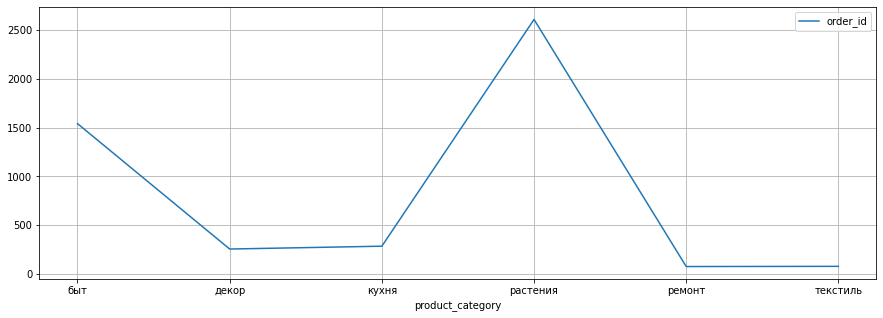

In [29]:
(
    data_cut.pivot_table(index='product_category', values='order_id', aggfunc='count')\
    .plot(grid=True, figsize=(15, 5))
);

Распределение по заказам соответсвует наполнению магазина. В первую очередь покупают растения и хозяйственно-бытовые товары.

Изучим каждую категорию по разбросу цены.

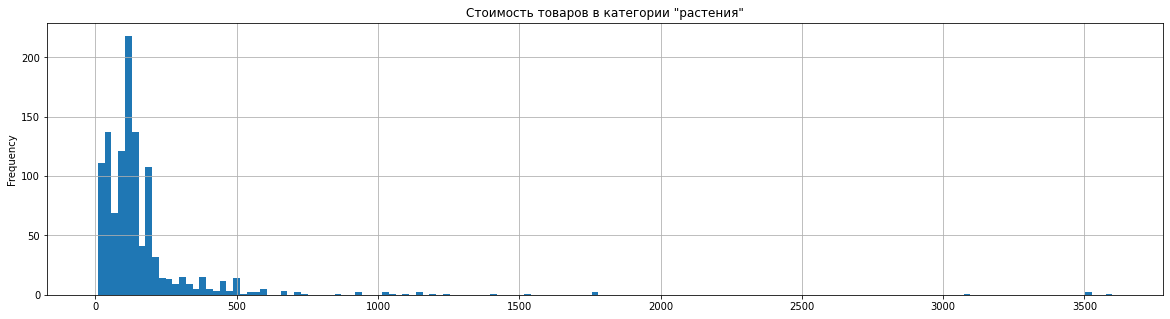

In [30]:
flowers = data_cut.query('product_category=="растения"')
flowers_price = flowers[['product', 'price']].drop_duplicates()
flowers_price['price'].plot(title='Стоимость товаров в категории "растения"', 
                            kind='hist',                            
                            grid=True, 
                            bins=150, 
                            figsize=(20, 5));

Основная масса товаров в категории "растения" стоит не более 250. Однако есть и более дорогие позиции - за 3500.

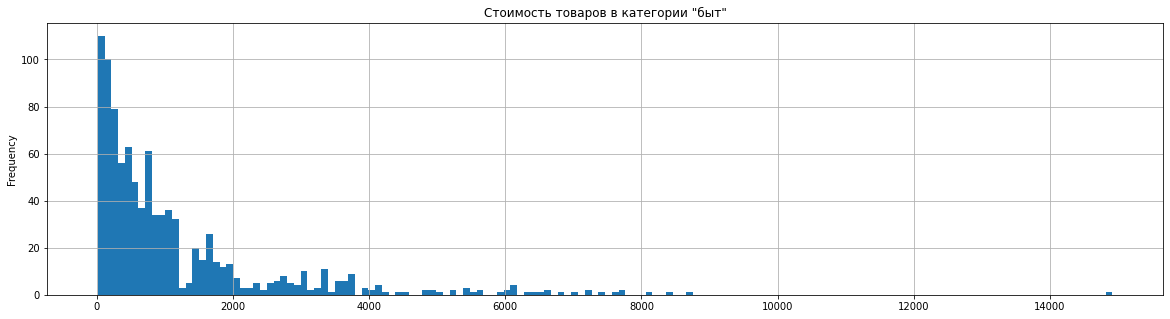

In [31]:
household = data_cut.query('product_category=="быт"')
household_price = household[['product', 'price']].drop_duplicates()
household_price['price'].plot(title='Стоимость товаров в категории "быт"', 
                            kind='hist',                            
                            grid=True, 
                            bins=150, 
                            figsize=(20, 5));

Хозтовары логично дороже цветов - бОльшая часть до 2000, но есть товары и за 8000.

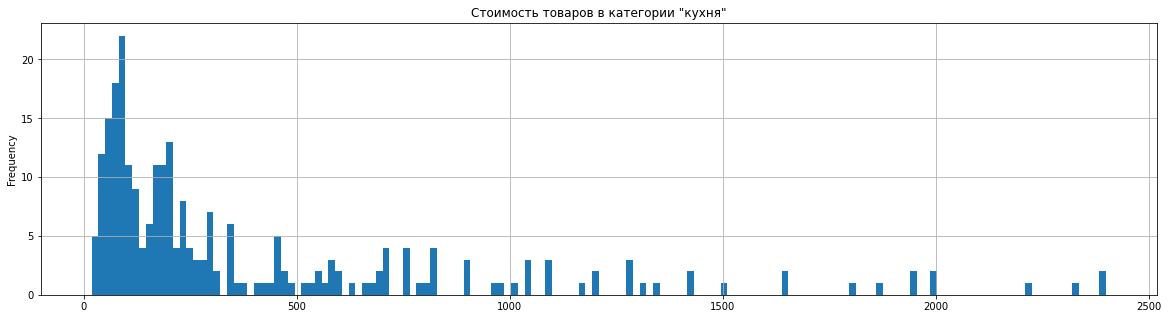

In [32]:
kitchen = data_cut.query('product_category=="кухня"')
kitchen_price = kitchen[['product', 'price']].drop_duplicates()
kitchen_price['price'].plot(title='Стоимость товаров в категории "кухня"', 
                            kind='hist',                            
                            grid=True, 
                            bins=150, 
                            figsize=(20, 5));

Кухонные принадлежности в магазине обойдутся максимум в 2500, основной ассортимент - не более 1000.

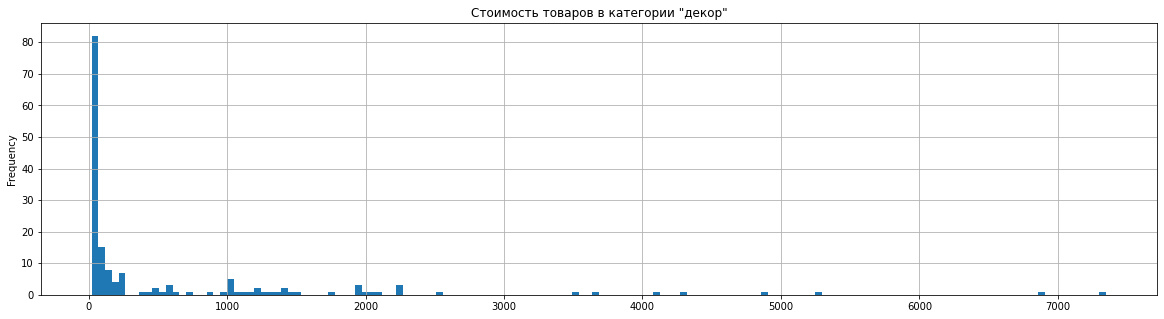

In [33]:
decor = data_cut.query('product_category=="декор"')
decor_price = decor[['product', 'price']].drop_duplicates()
decor_price['price'].plot(title='Стоимость товаров в категории "декор"', 
                            kind='hist',                            
                            grid=True, 
                            bins=150, 
                            figsize=(20, 5));

В отделе "декор" присутствует большое количество дешевых товаров - около 100 у.е. Скорее всего, сюда попали искусственные цветы. Остальные товары оцениваются до 2000 и есть несколько позиций до 7500.

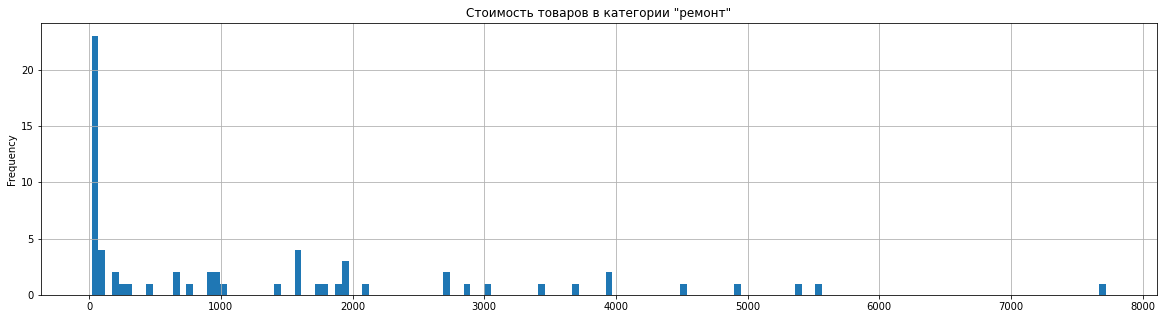

In [34]:
repair = data_cut.query('product_category=="ремонт"')
repair_price = repair[['product', 'price']].drop_duplicates()
repair_price['price'].plot(title='Стоимость товаров в категории "ремонт"', 
                            kind='hist',                            
                            grid=True, 
                            bins=150, 
                            figsize=(20, 5));

В строительных товарах также есть набор недорогих товаров, остальные же распределены относительно равномерно до 2000 и далее встречаются единичные товары до 8000.

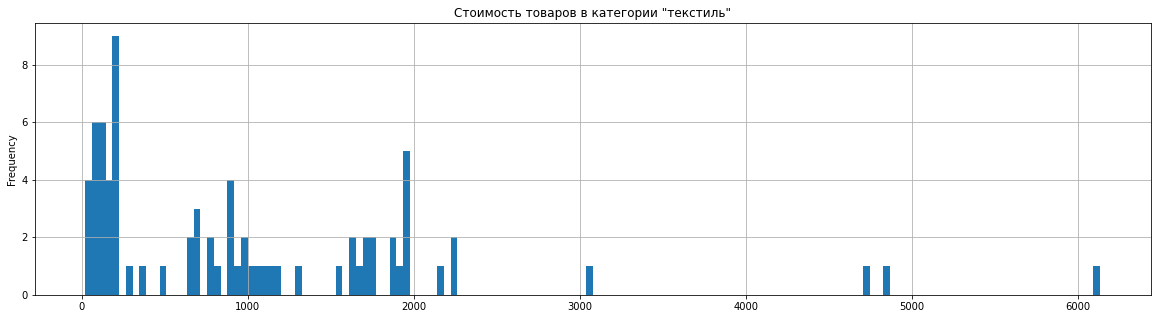

In [35]:
textile = data_cut.query('product_category=="текстиль"')
textile_price = textile[['product', 'price']].drop_duplicates()
textile_price['price'].plot(title='Стоимость товаров в категории "текстиль"', 
                            kind='hist',                            
                            grid=True, 
                            bins=150, 
                            figsize=(20, 5));

Текстиль в магазине можно приобрести по цене до 2000 и некоторые позиции до 6500.

Посмотрим на общую прибыль, количество заказов и средний чек по категориям.

In [36]:
income = data_cut.pivot_table(index='product_category', values=['sum', 'order_id'], aggfunc={'sum':'sum', 'order_id':'count'})
income['avg'] = income['sum']/income['order_id']
income.sort_values(by='sum', ascending=False).round(2)

,order_id,sum,avg
product_category,,,
быт,1540,2074000.0,1346.75
растения,2605,574233.0,220.43
декор,258,250676.0,971.61
кухня,287,217827.0,758.98
текстиль,81,209915.0,2591.54
ремонт,79,132403.0,1675.99


Несмотря на то, что растения покупают больше всего, основной доход приносят хозяйственно-бытовые товары. Общая прибыль составила почти в 4 раза больше, чем у цветов. Также растения имеют самый низкий средний чек. Самый же большой - в категории "текстиль".

<a id="season"></a>
### Сезонность товаров

Изучим, как меняется количество заказов в течение года.

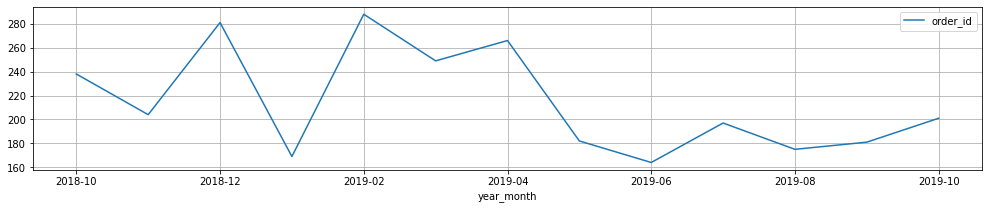

In [37]:
data_cut.sort_values(by='date').pivot_table(index='year_month', values='order_id', aggfunc='nunique').plot(grid=True, figsize=(17, 3));

Максимум заказов было совершено зимой (за исключением января) и весной. Меньше осенью, а летом наблюдается затишье.

Посмотрим, как меняются продажи категорий товаров по сезонам.

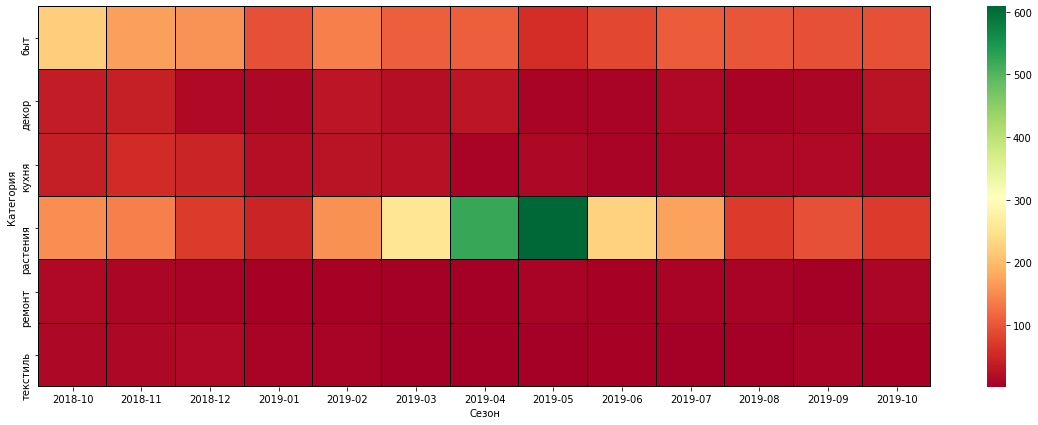

In [38]:
product_sales_by_season = data_cut.pivot_table(index='product_category', columns = 'year_month', values='order_id', aggfunc='count')
plt.figure(figsize = (20, 7))
sns.heatmap(product_sales_by_season, cmap='RdYlGn', linewidth=0.01, linecolor='black')
plt.xlabel('Сезон')
plt.ylabel('Категория');

Максимальный поток заказов приходится весной в категории "растения" - стартует сезон посадок и открытия дач. В целом в этой категории спад заметен только зимой. Летом и осенью спрос также довольно высок.

В категории "быт" пик наоборот приходится на осень и отчасти зиму - дачные дела все завершены, все возвращаются домой и начинают заниматься благоустройством. Весной и летом заметно падение интереса к данным товарам.

В остальных категориях спрос равномерно небольшой в течение всего года.

Посмотрим, в каком сезоне делают самые дорогие заказы.

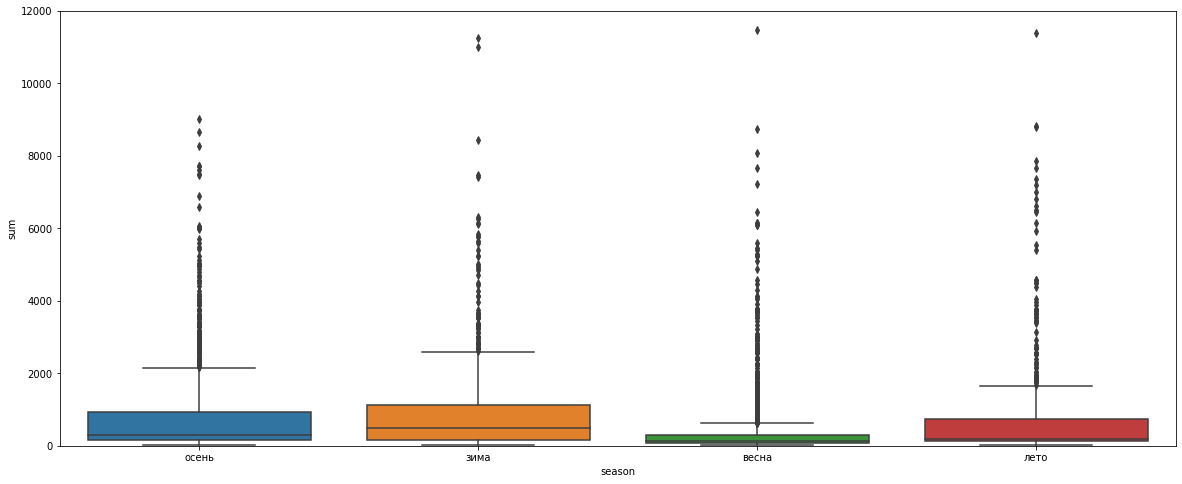

In [39]:
plt.figure(figsize = (20, 8))
plt.ylim([0, 12000])
sns.boxplot(data = data_cut, x='season', y='sum');

Несмотря на преобладающее количество весенних покупок, они приносят самую маленькую прибыль. Зимние чеки намного превышают остальные и по медиане, и по выбросам.

Посмотрим, какие покупки совершают клиенты зимой.

In [40]:
winter = data_cut.query('season=="зима"')
winter.sort_values(by='quantity', ascending=False).head(20)

,date,customer_id,order_id,product,quantity,price,month,year_month,season,sum,product_category
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0,12,2018-12,зима,5800.0,ремонт
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,Щетка для мытья посуды КОЛИБРИ М5202 большая,100,34.0,1,2019-01,зима,3400.0,быт
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"Щетка для посуды *ОЛЯ*, Мультипласт 1807010",100,26.0,12,2018-12,зима,2600.0,быт
1299,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъе...,57,574.0,12,2018-12,зима,32718.0,быт
1484,2019-01-11 22:00:00,34b2bf7d-7cd8-4aba-909d-396655d77f7e,69793,Вешалка Valiant для брюк и юбок металлическая ...,50,94.0,1,2019-01,зима,4700.0,быт
1897,2019-02-18 16:00:00,74b08ab4-16e9-4d83-9c31-acfc9d229bc5,70328,Муляж Лимон желтый 9 см полиуретан,50,51.0,2,2019-02,зима,2550.0,декор
2049,2019-02-27 09:00:00,377c8a20-a3e0-4945-9fd8-a1f4ada5d8b0,70482,Муляж Банан желтый 21 см полиуретан,50,51.0,2,2019-02,зима,2550.0,декор
1568,2019-01-22 15:00:00,6be74251-7159-4cc0-99fb-d034a17c61b0,69928,Спатифиллум Шопен d-12 см,45,250.0,1,2019-01,зима,11250.0,растения
1316,2018-12-23 11:00:00,24c0b355-53e3-428a-b299-e1627b1cdd5c,69524,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,12,2018-12,зима,2360.0,декор
1092,2018-12-04 05:00:00,b0f1833c-0763-4f4e-b097-41d27a521e46,69194,Кружка НОРДИК 380мл прозрачная H8502 Luminarc ...,30,58.0,12,2018-12,зима,1740.0,кухня


Судя по количеству товаров зимой совершаются оптовые закупки. В это время строятся новые объекты, а гостиницы, рестораны и другие заведения готовятся к наступению теплых сезонов отпусков и прогулок.

<a id="segment"></a>
## Сегментация покупателей на основе истории их покупок

Для сегментации пользователей проведем RFM-анализ, сгруппируем их на основе давности, частоты и стоимости покупки.

Создадим таблицу и рассчитаем значения RFM по каждому покупателю.

In [41]:
segments = data_cut[['customer_id', 'order_id', 'date', 'sum']]
today = dt.datetime(2019,11,1)
segments = segments.groupby('customer_id').agg({'date': lambda x: (today - x.max()).days,
                                                'order_id': lambda x: len(x.unique()), 
                                                'sum': lambda x: x.sum()})  

segments['date'] = segments['date'].astype(int)
segments.rename(columns={'date': 'recency', 'order_id': 'frequency', 'sum': 'monetary_value'}, inplace=True)
segments.head()

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,15,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,257,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.0


Для выделения групп покупателей используем квартили.

In [42]:
quart = segments.quantile(q=[0.25,0.5,0.75])
quart

,recency,frequency,monetary_value
0.25,108.25,1.0,299.0
0.50,211.00,1.0,708.0
0.75,294.00,1.0,1574.0


In [43]:
quart = quart.to_dict()
final_segment = segments.copy()

def recency(value, rfm, quart):
    if value <= quart[rfm][0.25]:
        return 4
    elif value <= quart[rfm][0.50]:
        return 3
    elif value <= quart[rfm][0.75]: 
        return 2
    else:
        return 1
    
def freq_money(value, rfm, quart):
    if value <= quart[rfm][0.25]:
        return 1
    elif value <= quart[rfm][0.50]:
        return 2
    elif value <= quart[rfm][0.75]: 
        return 3
    else:
        return 4
final_segment['r_quarts'] = final_segment['recency'].apply(recency, args=('recency',quart,))
final_segment['f_quarts'] = final_segment['frequency'].apply(freq_money, args=('frequency',quart,))
final_segment['m_quarts'] = final_segment['monetary_value'].apply(freq_money, args=('monetary_value',quart,))
final_segment['rfm_class'] = final_segment.r_quarts.map(str) + final_segment.f_quarts.map(str) + final_segment.m_quarts.map(str)

Найдем самых лучших клиентов.

In [44]:
best = final_segment[final_segment['rfm_class']=='444'].sort_values('monetary_value', ascending=False)
best.reset_index(inplace=True)
best

,customer_id,recency,frequency,monetary_value,r_quarts,f_quarts,m_quarts,rfm_class
0,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,0,17,21361.0,4,4,4,444
1,126dac4d-6486-49ed-a1be-9fd55a38a9de,64,2,9148.0,4,4,4,444
2,7abce1cc-bc8c-4362-b61a-0cbb4822ed29,28,2,7950.0,4,4,4,444
3,facadcf2-2c13-4d8f-baa3-567821546534,104,2,7049.0,4,4,4,444
4,540072bd-cc85-43b5-a6d6-0a8720499e65,74,2,6898.0,4,4,4,444
5,922f7c8c-9241-4d9a-a37e-1f7dd1b03568,42,2,3674.0,4,4,4,444
6,d02429ab-22e0-4ff2-9465-3082befde444,67,3,3261.0,4,4,4,444
7,7b0b570c-16c7-4aed-b302-13fe1830d1e9,25,2,3223.0,4,4,4,444
8,6a86cc77-ef15-496f-b5d3-89005597ee5d,62,3,3151.0,4,4,4,444
9,e8204583-4d55-4724-ad3f-049c7db43bdd,55,3,3102.0,4,4,4,444


Прекрасные показатели - недавние частые покупки на большие суммы. Стоит их поблагодарить за такое доверие - запустить программу лояльности, предоставить ранний доступ к распродажам, сделать подарки.

Посмотрим теперь на тех, кто вот-вот уйдет.

In [45]:
leaving = final_segment[final_segment['r_quarts']<=2].sort_values('monetary_value', ascending=False)
leaving.reset_index(inplace=True)
leaving

,customer_id,recency,frequency,monetary_value,r_quarts,f_quarts,m_quarts,rfm_class
0,c971fb21-d54c-4134-938f-16b62ee86d3b,239,126,159508.0,2,4,4,244
1,4d93d3f6-8b24-403b-a74b-f5173e40d7db,372,35,57278.0,1,4,4,144
2,58a4c3cc-504f-43ea-a74a-bae19e665552,289,2,53232.0,2,4,4,244
3,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,336,1,33680.0,1,1,4,114
4,6987e6d6-a63a-4ce2-a2d0-f424092d235e,314,1,32718.0,1,1,4,114
5,1b2764ad-9151-4051-a46a-9b01b62e6335,359,1,24370.0,1,1,4,114
6,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,367,1,22056.0,1,1,4,114
7,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,269,1,16536.0,2,1,4,214
8,639c4989-b0ab-412a-b7ec-be394cb2d372,360,3,12095.0,1,4,4,144
9,86c97bf1-c834-423e-9e38-8acda68f97e8,318,2,11548.0,1,4,4,144


Стоит обратить внимание на первые три строки. Клиенты оформили объемные и дорогие заказы и больше не возвращались. И далее в списке также недешевые приобретения. Может быть стоит напомнить этой категории о себе?

А вот те, кто уже наверняка не вернется.

In [46]:
lost = final_segment[final_segment['rfm_class']=="111"].sort_values('recency', ascending=False)
lost.reset_index(inplace=True)
lost

,customer_id,recency,frequency,monetary_value,r_quarts,f_quarts,m_quarts,rfm_class
0,a576fa59-7b28-4a4c-a496-92f128754a94,395,1,188.0,1,1,1,111
1,6644e5b4-9934-4863-9778-aaa125207701,395,1,269.0,1,1,1,111
2,5f75c73a-1305-4079-b040-2bcb42085002,394,1,299.0,1,1,1,111
3,29a514f5-a27e-4939-85d5-874a0c3f7a2c,394,1,193.0,1,1,1,111
4,eee7b1fa-ba81-4049-add6-370ee5e62e72,393,1,187.0,1,1,1,111
5,1e17318f-c4f1-4d0f-8ee4-9bf976c5b4ef,393,1,127.0,1,1,1,111
6,6f614f8f-4e47-4b87-8594-fe2d2c3b7077,392,1,149.0,1,1,1,111
7,ec7d88d5-2a52-4843-80d7-1f193f1c44e1,391,1,149.0,1,1,1,111
8,fc7d1558-6c08-413b-86a2-deec73d5fff7,391,1,149.0,1,1,1,111
9,b6f177c7-20f6-4e4e-87ca-484908f8e729,388,1,280.0,1,1,1,111


Перед нами довольно внушительный список покупателей, которые зашли на сайт около года назад, совершили одну дешевую покупку и больше не возвращались. Здесь стоит подумать о том, как не допускать такого оттока в будущем. Например, предлагать сопутствующие товары, товары той же категории, рекомендовать сезонные товары.

И наконец взглянем на тех, кто с нами постоянно.

In [47]:
constantly = final_segment[final_segment['f_quarts']>=3].sort_values('monetary_value', ascending=False)
constantly.reset_index(inplace=True)
constantly

,customer_id,recency,frequency,monetary_value,r_quarts,f_quarts,m_quarts,rfm_class
0,c971fb21-d54c-4134-938f-16b62ee86d3b,239,126,159508.0,2,4,4,244
1,4d93d3f6-8b24-403b-a74b-f5173e40d7db,372,35,57278.0,1,4,4,144
2,58a4c3cc-504f-43ea-a74a-bae19e665552,289,2,53232.0,2,4,4,244
3,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,195,4,41900.0,3,4,4,344
4,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,0,17,21361.0,4,4,4,444
5,940c175f-ea87-44e0-9e16-0a3d0a9abecd,141,2,20232.0,3,4,4,344
6,639c4989-b0ab-412a-b7ec-be394cb2d372,360,3,12095.0,1,4,4,144
7,86c97bf1-c834-423e-9e38-8acda68f97e8,318,2,11548.0,1,4,4,144
8,a9089b7e-e6a5-48f9-9b76-48693b63a092,167,3,11495.0,3,4,4,344
9,02adb72a-3067-45e9-a3b5-f93d79d7496a,209,2,10723.0,3,4,4,344


Приятно видеть, что таких клиентов не мало. Остается только потрудиться и не потерять их. Сохранение и пополнение этой базы - залог постоянного дохода. Лучший исход будет, когда постоянные клиенты перейдут в категорию лучших.

<a id="hypo"></a>
## Проверка гипотез

### Гипотеза 1

Проверим следующую гипотезу:

Средние чеки у лучших клиентов и постоянных покупателей одинаковы.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем специальный t-тест.

In [48]:
#нулевая гипотеза - Средние чеки у лучших клиентов и постоянных покупателей равны
#альтернативная гипотеза - Средние чеки у лучших клиентов и постоянных покупателей не равны

best_list = best['customer_id']
constantly_list = constantly['customer_id']

best_check = data_cut.query('customer_id in @best_list')['sum'].groupby(data_cut['order_id']).agg('sum')
constantly_check = data_cut.query('customer_id in @constantly_list')['sum'].groupby(data_cut['order_id']).agg('sum')

alpha = 0.05
results = st.ttest_ind(best_check, constantly_check)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
avg_best_check = best_check.sum()/len(best_check)
avg_constantly_check = constantly_check.sum()/len(constantly_check)
print( )
print ('Средний чек среди лучших клиентов равен:', avg_best_check)
print ('Средний чек среди постоянных клиентов равен:', avg_constantly_check)


p-значение: 0.2746835886104066
Не получилось отвергнуть нулевую гипотезу

Средний чек среди лучших клиентов равен: 1630.5185185185185
Средний чек среди постоянных клиентов равен: 1235.606463878327


Результат теста показал, что действительно средние чеки у лучших и постоянных примерно одинаковы. Значит, у постоянных клиентов есть все шансы перейти в категорию лучших.

### Гипотеза 2

Проверим следующую гипотезу:

Среднее количество заказов у ушедших клиентов и тех, что скоро уйдут, одинакова.

Здесь также используем t-тест.

In [49]:
#нулевая гипотеза - Среднее количество заказов у ушедших клиентов и тех, что скоро уйдут, одинакова.
#альтернативная гипотеза - Среднее количеств заказов у ушедших клиентов и тех, что скоро уйдут, различается.

lost_list = lost['customer_id']
leaving_list = leaving['customer_id']

lost_amt = data_cut.query('customer_id in @lost_list')['order_id'].groupby(data_cut['customer_id']).agg('count')
leaving_amt = data_cut.query('customer_id in @leaving_list')['order_id'].groupby(data_cut['customer_id']).agg('count')

alpha = 0.05
results = st.ttest_ind(lost_amt, leaving_amt)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
avg_lost_amt = lost_amt.sum()/len(lost_amt)
avg_leaving_amt = leaving_amt.sum()/len(leaving_amt)
print( )
print ('Средний количество заказов у ушедших клиентов равно:', avg_lost_amt)
print ('Средний количество заказов у клиентов, что вот-вот уйдут, равно:', avg_leaving_amt)

p-значение: 0.10284957711771676
Не получилось отвергнуть нулевую гипотезу

Средний количество заказов у ушедших клиентов равно: 1.0285714285714285
Средний количество заказов у клиентов, что вот-вот уйдут, равно: 1.7769607843137254


Здесь также не получилось отвергнуть нулевую гипотезу - те клиенты, которые скоро будут потеряны, заказывают примерно столько же, сколько и ушедшие. 

<a id="conclusion"></a>
## Общие выводы и рекомендации

**В ходе исследования** было изучено 6737 записей о транзакциях интернет-магазина товаров для дома и быта «Пока все ещё тут». Были выделены несколько сегментов покупателей с целью разработки персонализированных предложений.

**На этапе предобработки** данные были проверены на пропуски и дубликаты. Пропуски и явные дубликаты отсутствуют. Однако, было выявлено много повторов заказов в разное время. За актуальный заказ была выбрана последняя запись. Также на этом этапе  столбец с датой заказа был приведен к корректному типу. Были определены временные рамки исследуемых данных с 1 октября 2018 по 31 октября 2019. Созданы столбцы с номером месяца и временем года, а также с суммой заказа.

Были изучены основные характеристики по некоторым столбцам - количеству товара, цене и сумме заказа. Для дальнейшего анализа были исключены заказы на более 1000 шт. товара. Каждому товару была присвоена одна из 6 категорий - растения, декор, текстиль, быт, кухня и ремонт.

Во время **исследовательского анализа** были изучены категории товаров и их сезонность. Интернет-магазин обладает обширным списком товаров для дома и сада. Но основной уклон ассортимента сделан на растения (комнатные и садовые) и хозяйственно-бытовые товары. Эти же две категории заказывают больше всего. Интересно, что хоть растений и представлено больше всего, основной доход приносит категория "быт". Основная масса покупок совершается зимой и весной. Меньше осенью, а летом наблюдается затишье. Весной раскупают рассаду, а осенью средства для дома. Зимние заказы приносят самый большой доход - происходят оптовые продажи.

Проведена **сегментация пользователей** с использованием RFM-анализа. Выделено 4 сегмента:
- самые лучшие клиенты - покупали недавно, много и на крупную сумму,
- клиенты на грани ухода - последняя покупка сделана давно,
- ушедшие - те, кто однажды давным-давно купил что-то дешевое,
- постоянные - регулярно делают заказы в магазине.

Было проверено **две гипотезы**. Результаты тестов показали следующее:
- средние чеки у лучших клиентов и постоянных покупателей совпадают;
- среднее количество заказов у ушедших клиентов и тех, что скоро уйдут, одинаково.

Предложены следующие **рекомендации** в отношении разных категорий: 
- лучшим клиентам предоставить особые условия обслуживания - ранний доступ к скидкам, подарки при заказе, бесплатная доставка,
- запустить программу лояльности с накоплением бонусов,
- тем, кто давно не делал заказов, напомнить о себе - запустить рассылку с акциями на приобретенные ранее товары или с похожими товарами,
- данные об ушедших пользователях использовать для предотвращения будущих потерь - отслеживать группу риска и прорабатывать их - рассылка/звонок/бонусы на покупки,
- сохранять и пополнять список постоянных клиентов - увеличить средний чек,
- склонять новых покупателей к скорой повторной покупке,
- предлагать сопутствующие товары,
- рекомендовать сезонные товары,
- разделить частных покупателей и компании.

По ссылке доступна презентация: https://disk.yandex.ru/i/2JUOOtgXjbjuBw

In [53]:
data_cut.to_csv('data_cut.csv', index=False)